In [1]:
import numpy as np
import pandas as pd
from scipy.stats import qmc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Feature parameter lists
list_T = [25, 50]
list_Ri_t = [0.5, 1.0, 2.0, 3.0, 4.0]
list_A1 = [60, 70, 80]
list_W1 = [3]
list_Bead = [20, 30]
list_BFLUX = [25000, 30000, 35000, 40000]

# Combine all feature lists into a single list
feature_lists = [list_T, list_Ri_t, list_A1, list_W1, list_Bead, list_BFLUX]

# Number of samples to generate
n_samples = 150

# Number of features (dimensionality)
n_features = len(feature_lists)

# Latin Hypercube Sampling
lhs = qmc.LatinHypercube(d=n_features)
sample = lhs.random(n=n_samples)

# Scale the LHS samples to the range of each feature list
scaled_samples = np.zeros_like(sample)

for i, feature_list in enumerate(feature_lists):
    # Define the importance weights
    if i == 0:  # T: 크기의 제곱에 비례
        weights = np.array(feature_list, dtype=np.float64)**2  # 크기의 제곱
        weights /= np.sum(weights)  # 가중치 정규화
    elif i == 2:  # A1: 크기의 3제곱에 반비례
        weights = 1 / np.array(feature_list, dtype=np.float64)**6  # 크기의 6제곱에 반비례
        weights /= np.sum(weights)
    elif i == 4:  # Bead: 크기의 제곱에 반비례
        weights = 1 / np.array(feature_list, dtype=np.float64)**2  # 크기의 제곱에 반비례
        weights /= np.sum(weights)
    else:
        weights = np.ones_like(feature_list, dtype=np.float64) / len(feature_list)  # 균등한 가중치
    
    # Use numpy's random.choice to sample based on the weights
    scaled_samples[:, i] = np.random.choice(feature_list, size=n_samples, p=weights)

# Convert to DataFrame
columns = ['T', 'Ri_t', 'A1', 'W1', 'Bead', 'BFLUX']
df = pd.DataFrame(scaled_samples, columns=columns)

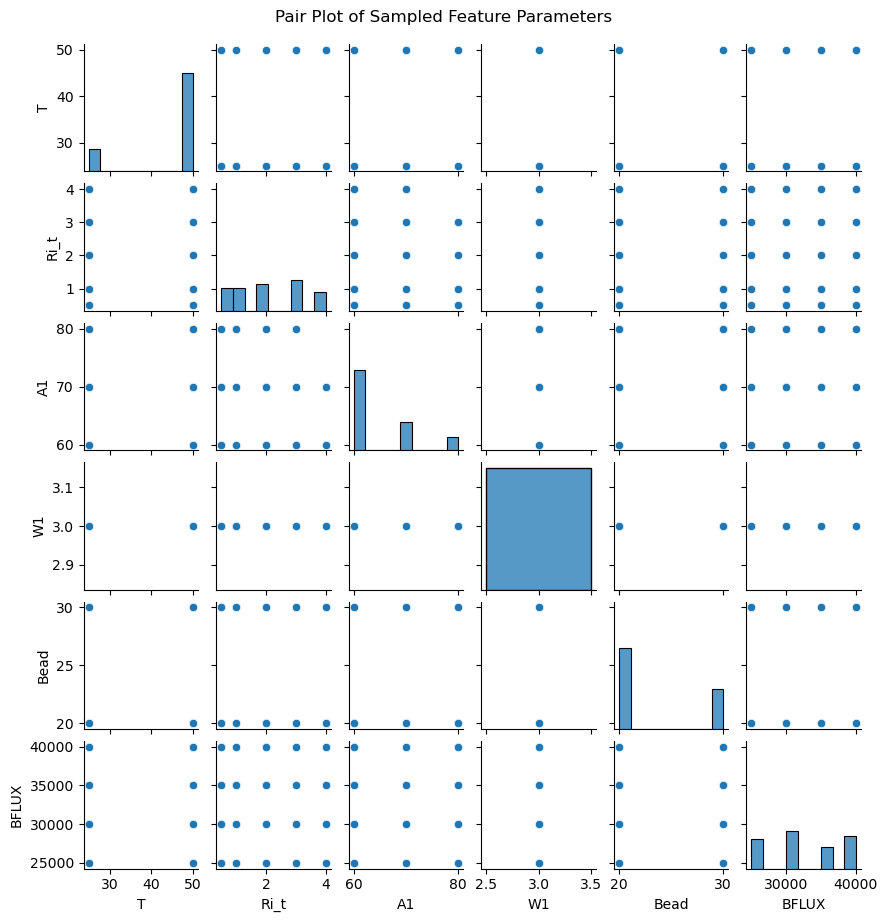

In [3]:
# 1) Pair Plot
sns.pairplot(df, height=1.5, aspect=1.0)  # height와 aspect로 크기 조정
plt.suptitle('Pair Plot of Sampled Feature Parameters', y=1.02)
plt.show()

In [4]:
### CSV로 저장 ###
df.to_csv('sampled_feature_parameters.csv', index=False)
print("CSV file 'sampled_feature_parameters.csv' has been created.")

CSV file 'sampled_feature_parameters.csv' has been created.


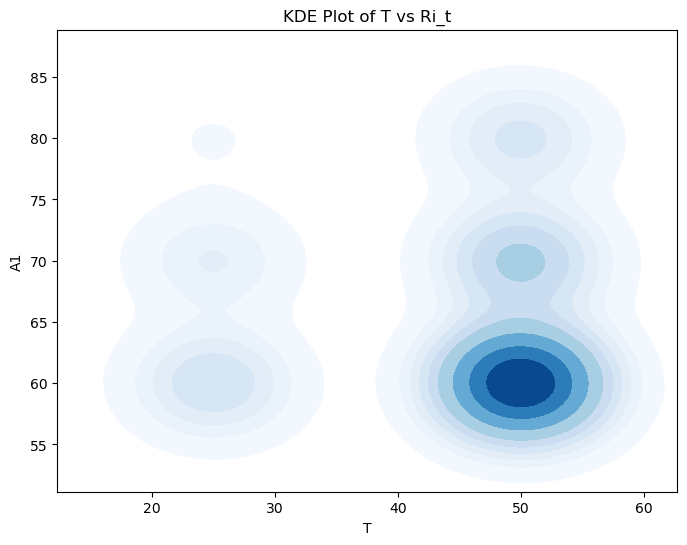

In [5]:
# 2D KDE Plot: T와 Ri_t의 관계
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='T', y='A1', fill=True, cmap='Blues')
plt.title('KDE Plot of T vs Ri_t')
plt.show()

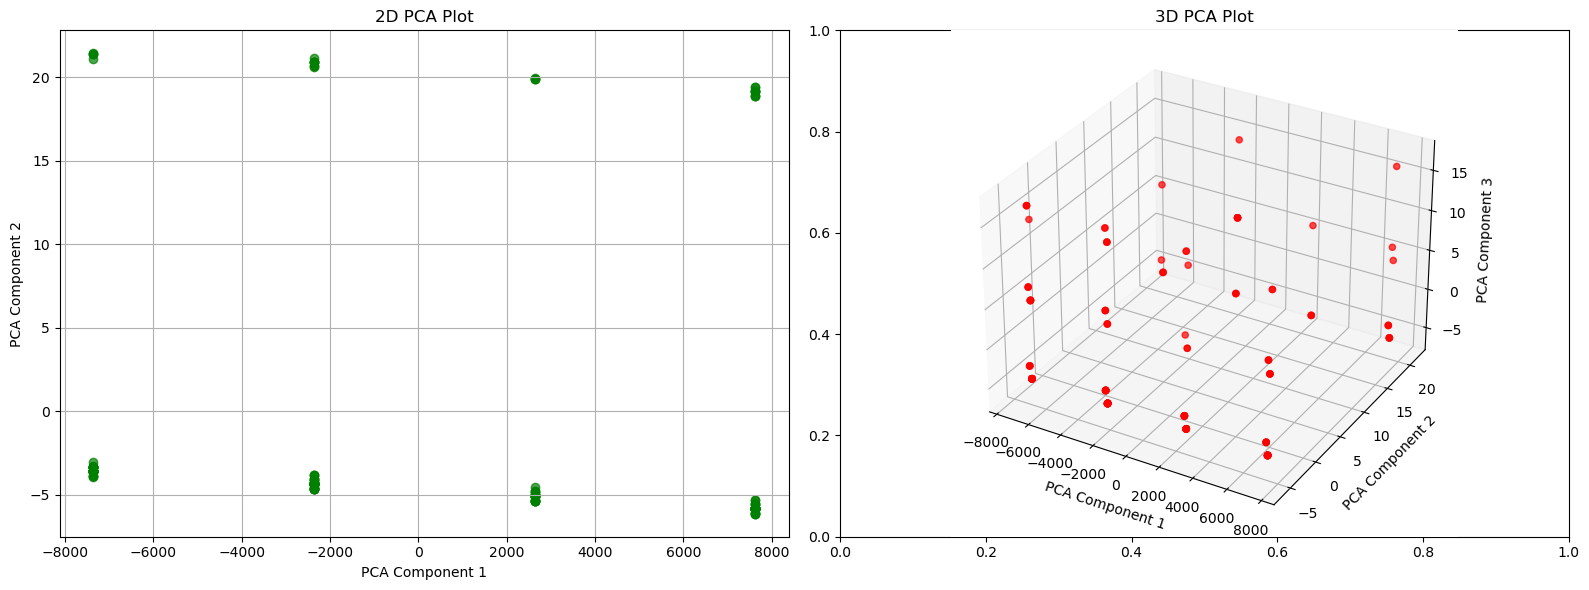

In [6]:
# 2차원 및 3차원 PCA Plot
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df)

# 1행 2열의 서브플롯 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 2D PCA Plot
ax1.scatter(x_pca[:, 0], x_pca[:, 1], c='green', marker='o', alpha=0.7)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('2D PCA Plot')
ax1.grid(True)

# 3D PCA Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c='red', marker='o', alpha=0.7)
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
ax2.set_title('3D PCA Plot')

# 서브플롯 간 레이아웃 조정
plt.tight_layout()
plt.show()

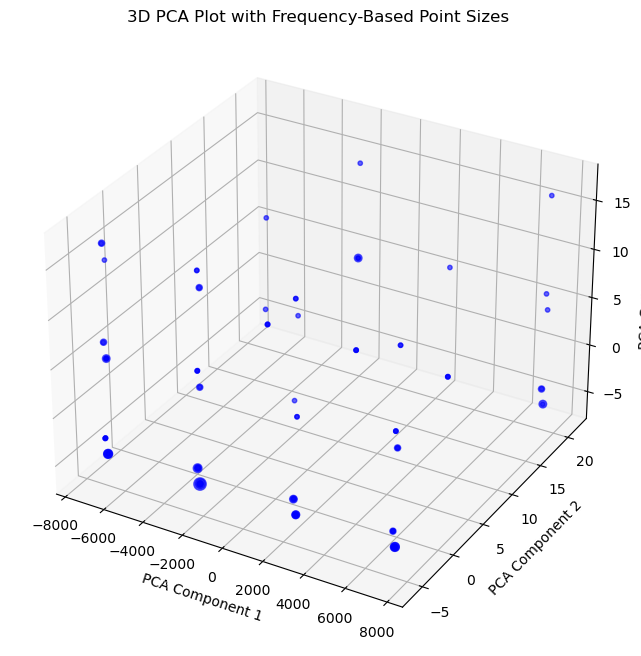

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
# 예제에서는 위의 scaled_samples 데이터를 사용한다고 가정
df = pd.DataFrame(scaled_samples, columns=['T', 'Ri_t', 'A1', 'W1', 'Bead', 'BFLUX'])

# PCA 적용
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df)

# 빈도수를 포인트 크기로 표현
unique, counts = np.unique(x_pca, axis=0, return_counts=True)
sizes = counts * 10  # 빈도수에 따라 크기 조정 (10배)

# 3D PCA Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(unique[:, 0], unique[:, 1], unique[:, 2], c='b', s=sizes, alpha=0.6)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Plot with Frequency-Based Point Sizes')

plt.show()


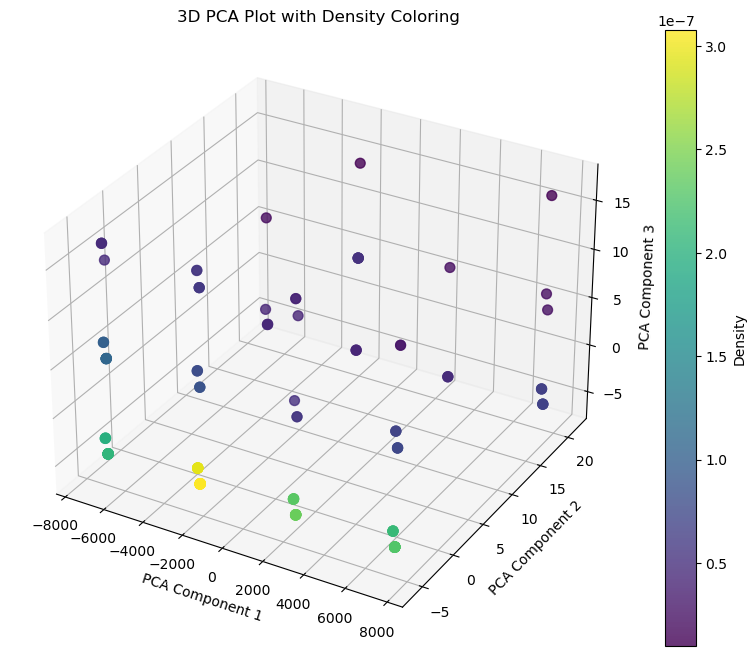

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde

# 데이터 로드
df = pd.DataFrame(scaled_samples, columns=['T', 'Ri_t', 'A1', 'W1', 'Bead', 'BFLUX'])

# PCA 적용
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df)

# 밀도를 계산
kde = gaussian_kde(x_pca.T)
density = kde(x_pca.T)

# 3D PCA Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=density, cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Plot with Density Coloring')

# Colorbar 추가
cbar = plt.colorbar(sc)
cbar.set_label('Density')

plt.show()
